# Part 1. Getting Started- Load Packages

In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-nty3dem5
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-nty3dem5
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-c0m73124/pyfolio_3e5dd2d3cb7c4af0b3801f26046ae728
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-c0m73124/pyfolio_3e5dd2d3cb7c4af0b3801f26046ae728
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-c0m73124/elegantrl_5ded587b6da74e40a287c548ce86f59f
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-c0m73124/elegantrl_5ded587b6da74e40a287c548ce86f59f


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.config import INDICATORS
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
#from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
from env_reverse import StockTradingEnv

In [ ]:
from model_with_reverse_env_ppo import DRLAgent,DRLEnsembleAgent

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


# Part 2. Download Data

In [ ]:
df = YahooDownloader(start_date = '2009-04-01',
                     end_date = '2019-03-01',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.314393,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477924,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772777,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850752,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820396,15308300.0,CAT,2


In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.314393,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477924,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772777,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850752,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820396,15308300.0,CAT,2


In [ ]:
len(df.tic.unique())

29

# Part 3: Preprocess Data

In [ ]:
df.tic.value_counts()

AAPL    2495
JPM     2495
WBA     2495
VZ      2495
V       2495
UNH     2495
TRV     2495
PG      2495
NKE     2495
MSFT    2495
MRK     2495
MMM     2495
MCD     2495
KO      2495
JNJ     2495
AMGN    2495
INTC    2495
IBM     2495
HON     2495
HD      2495
GS      2495
DIS     2495
CVX     2495
CSCO    2495
CRM     2495
CAT     2495
BA      2495
AXP     2495
WMT     2495
Name: tic, dtype: int64

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


# Part 4. Design Environment

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

# Part 5: Run the Model

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-04-01'
train_end = '2018-01-01'
val_test_start = '2018-01-01'
val_test_end = '2019-03-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  176.65965137910695
======Model training from:  2009-04-01 to  2018-01-02
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device
Logging to tensorboard_log/ppo/ppo_126_5
---------------------------------
| time/              |          |
|    fps             | 87       |
|    iterations      | 1        |
|    time_elapsed    | 23       |
|    total_timesteps | 2048     |
| train/             |          |
|    reward          | 73.88814 |
---------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 85          |
|    iterations           | 2           |
|    time_elapsed         | 48          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017884599 |
|    clip_fraction        | 0.235       |
|    cl

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,PPO Sharpe,PPO REVERSE Sharpe
0,126,2018-01-02,2018-04-04,PPO,-0.067398,-0.070319
1,189,2018-04-04,2018-07-03,PPO,0.164727,-0.140979
2,252,2018-07-03,2018-10-02,PPO,0.273931,-0.168595


# Part 6: Backtest Our Strategy

In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))


    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.28591269115990403


In [ ]:
print(df_account_value)


     account_value        date  daily_return    datadate
0     1.000000e+06  2018-04-04           NaN  2018-04-04
1     1.000513e+06  2018-04-05      0.000513  2018-04-05
2     9.737229e+05  2018-04-06     -0.026776  2018-04-06
3     9.694786e+05  2018-04-09     -0.004359  2018-04-09
4     9.869356e+05  2018-04-10      0.018007  2018-04-10
..             ...         ...           ...         ...
184   1.012702e+06  2018-12-26      0.062390  2018-12-26
185   1.024506e+06  2018-12-27      0.011656  2018-12-27
186   1.017741e+06  2018-12-28     -0.006603  2018-12-28
187   1.031663e+06  2018-12-31      0.013680  2018-12-31
188   1.028033e+06  2019-01-02     -0.003519  2019-01-02

[189 rows x 4 columns]


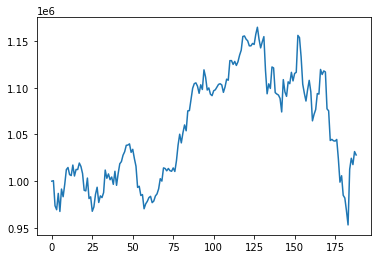

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

# 6.1 BackTestStats

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.037551
Cumulative returns     0.028033
Annual volatility      0.196762
Sharpe ratio           0.285913
Calmar ratio           0.206884
Stability              0.337851
Max drawdown          -0.181507
Omega ratio            1.051899
Sortino ratio          0.416348
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.839894
Daily value at risk   -0.024566
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)
Annual return         -0.051411
Cumulative returns    -0.038610
Annual volatility      0.164254
Sharpe ratio          -0.241297
Calmar ratio          -0.273870
Stability              0.015498
Max drawdown          -0.187719
Omega ratio            0.958144
Sortino ratio         -0.329013
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.670360
Daily value at risk   -0.020851
dtype: float64


# 6.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)


Start date,2018-04-04
End date,2019-01-02
Total months,9
,Backtest
Annual return,3.755%
Cumulative returns,2.803%
Annual volatility,19.676%
Sharpe ratio,0.29
Calmar ratio,0.21
Stability,0.34
Max drawdown,-18.151%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.15,2018-10-03,2018-12-24,NaT,NaN
1,6.67,2018-06-12,2018-06-25,2018-07-26,33
2,5.06,2018-04-27,2018-05-09,2018-06-05,28
3,3.29,2018-04-05,2018-04-11,2018-04-17,9
4,2.47,2018-08-16,2018-08-23,2018-09-10,18


Stress Events,mean,min,max
New Normal,0.02%,-3.53%,6.24%


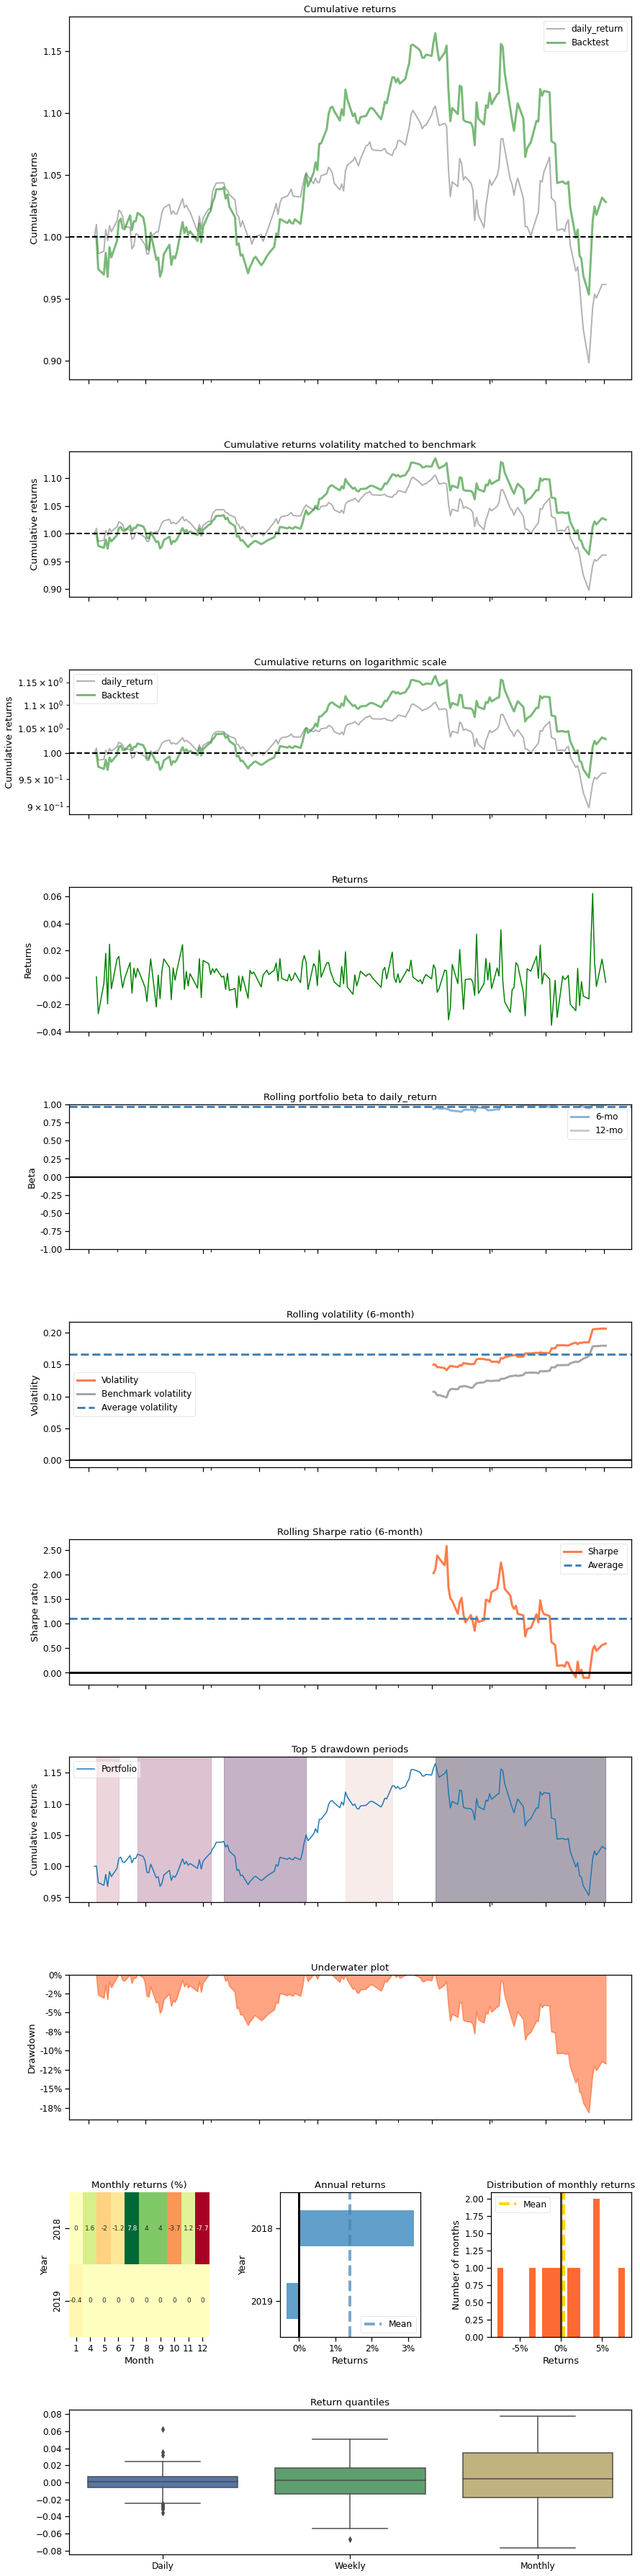

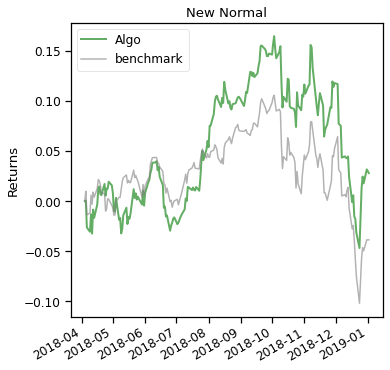

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])